In [12]:
import numpy as np
import keras
from keras.models import Model
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import pandas as pd

In [3]:
IMG_SIZE = (299, 299)  # размер входного изображения сети

In [4]:
import re
from random import shuffle
from glob import glob

train_files = glob('/home/spynal/Netology/Data/CvD/train_1/train/*.jpg')
test_files = glob('/home/spynal/Netology/Data/CvD/test_/test/*.jpg')

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = load_img(path, target_size=target_size)  # загрузка и масштабирование изображения
    array = img_to_array(img)
    return preprocess_input(array)  # предобработка для VGG16

# генератор для последовательного чтения обучающих данных с диска
def fit_generator(files, batch_size=32):
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if re.match('.*/dog\.\d', path) else 0. for path in files[i:j]])
            yield (x, y)

# генератор последовательного чтения тестовых данных с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

In [5]:
base_model = Xception(include_top = False,
                   weights = 'imagenet',
                   input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3))

In [6]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [13]:
shuffle(train_files)  # перемешиваем обучающую выборку

train_val_split = 100  # число изображений в валидационной выборке

validation_data = next(fit_generator(train_files[:train_val_split], train_val_split))

# запускаем процесс обучения
model.fit_generator(fit_generator(train_files[train_val_split:]),  # данные читаем функцией-генератором
        steps_per_epoch=10,  # число вызовов генератора за эпоху
        epochs=100,  # число эпох обучения
        validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 21s 2s/step - loss: 0.2272 - acc: 0.8969 - val_loss: 0.0298 - val_acc: 1.0000
Epoch 2/100
10/10 [==============================] - 8s 836ms/step - loss: 0.1390 - acc: 0.9563 - val_loss: 0.0565 - val_acc: 0.9900
Epoch 3/100
10/10 [==============================] - 8s 837ms/step - loss: 0.1090 - acc: 0.9656 - val_loss: 0.0848 - val_acc: 0.9800
Epoch 4/100
10/10 [==============================] - 8s 842ms/step - loss: 0.1915 - acc: 0.9406 - val_loss: 0.0452 - val_acc: 0.9900
Epoch 5/100
10/10 [==============================] - 8s 843ms/step - loss: 0.0902 - acc: 0.9750 - val_loss: 0.0230 - val_acc: 1.0000
Epoch 6/100
10/10 [==============================] - 8s 847ms/step - loss: 0.0964 - acc: 0.9719 - val_loss: 0.0869 - val_acc: 0.9800
Epoch 7/100
10/10 [==============================] - 8s 849ms/step - loss: 0.0520 - acc: 0.9875 - val_loss: 0.0356 - val_acc: 1.0000
Epoch 8/100
10/10 [==============================] - 9s 852ms/step - lo

10/10 [==============================] - 9s 858ms/step - loss: 0.0172 - acc: 0.9938 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 63/100
10/10 [==============================] - 9s 856ms/step - loss: 0.1118 - acc: 0.9625 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 64/100
10/10 [==============================] - 9s 858ms/step - loss: 0.0687 - acc: 0.9750 - val_loss: 0.0215 - val_acc: 1.0000
Epoch 65/100
10/10 [==============================] - 9s 858ms/step - loss: 0.0446 - acc: 0.9906 - val_loss: 0.0305 - val_acc: 1.0000
Epoch 66/100
10/10 [==============================] - 9s 857ms/step - loss: 0.0443 - acc: 0.9844 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 67/100
10/10 [==============================] - 9s 857ms/step - loss: 0.0643 - acc: 0.9812 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 68/100
10/10 [==============================] - 9s 857ms/step - loss: 0.0181 - acc: 0.9938 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 69/100
10/10 [==============================] - 9s 855ms/step - loss:

In [16]:
pred = model.predict_generator(predict_generator(test_files), len(test_files), max_queue_size=500, verbose = 1)

12500/12500 [==============================] - 499s 40ms/step


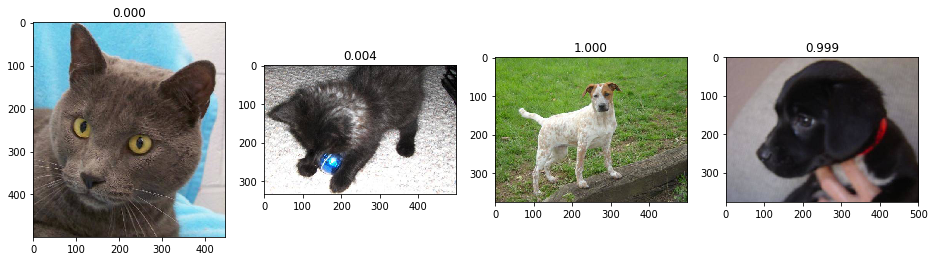

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 20))
for i, (path, score) in enumerate(zip(test_files[:4], pred[:4]), 1):
    subplot = fig.add_subplot(i // 5 + 1, 5, i)
    plt.imshow(plt.imread(path));
    subplot.set_title('%.3f' % score);

In [15]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_1
13 block2_pool
14 batch_normalization_1
15 add_1
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_2
23 block3_pool
24 batch_normalization_2
25 add_2
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_3
33 block4_pool
34 batch_normalization_3
35 add_3
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_4
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepcon

In [19]:
for layer in model.layers[:115]:
   layer.trainable = False
for layer in model.layers[115:]:
   layer.trainable = True



In [20]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy')

In [21]:
model.fit_generator(fit_generator(train_files[train_val_split:]),  # данные читаем функцией-генератором
        steps_per_epoch=10,  # число вызовов генератора за эпоху
        epochs=100,  # число эпох обучения
        validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 10s 1s/step - loss: 0.0385 - val_loss: 0.0277
Epoch 2/100
10/10 [==============================] - 9s 947ms/step - loss: 0.0485 - val_loss: 0.0214
Epoch 3/100
10/10 [==============================] - 10s 951ms/step - loss: 0.0346 - val_loss: 0.0193
Epoch 4/100
10/10 [==============================] - 10s 952ms/step - loss: 0.0301 - val_loss: 0.0195
Epoch 5/100
10/10 [==============================] - 10s 955ms/step - loss: 0.0360 - val_loss: 0.0179
Epoch 6/100
10/10 [==============================] - 10s 956ms/step - loss: 0.0602 - val_loss: 0.0177
Epoch 7/100
10/10 [==============================] - 10s 958ms/step - loss: 0.0292 - val_loss: 0.0175
Epoch 8/100
10/10 [==============================] - 10s 958ms/step - loss: 0.0344 - val_loss: 0.0168
Epoch 9/100
10/10 [==============================] - 10s 956ms/step - loss: 0.0455 - val_loss: 0.0170
Epoch 10/100
10/10 [==============================] - 10s 956ms/step - loss: 0.0546 - 

10/10 [==============================] - 10s 953ms/step - loss: 0.0175 - val_loss: 0.0066
Epoch 81/100
10/10 [==============================] - 10s 954ms/step - loss: 0.0252 - val_loss: 0.0067
Epoch 82/100
10/10 [==============================] - 10s 956ms/step - loss: 0.0177 - val_loss: 0.0070
Epoch 83/100
10/10 [==============================] - 10s 953ms/step - loss: 0.0616 - val_loss: 0.0070
Epoch 84/100
10/10 [==============================] - 10s 954ms/step - loss: 0.0282 - val_loss: 0.0068
Epoch 85/100
10/10 [==============================] - 10s 954ms/step - loss: 0.0665 - val_loss: 0.0066
Epoch 86/100
10/10 [==============================] - 10s 954ms/step - loss: 0.0215 - val_loss: 0.0065
Epoch 87/100
10/10 [==============================] - 10s 954ms/step - loss: 0.0184 - val_loss: 0.0066
Epoch 88/100
10/10 [==============================] - 10s 955ms/step - loss: 0.0093 - val_loss: 0.0065
Epoch 89/100
10/10 [==============================] - 10s 952ms/step - loss: 0.0185 - 

In [22]:
pred = model.predict_generator(predict_generator(test_files), len(test_files), max_queue_size=500, verbose = 1)

12500/12500 [==============================] - 509s 41ms/step


In [23]:
with open('submit.txt', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, pred):
        dst.write('%s,%f\n' % (re.search('(\d+)', path).group(0), score))